# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographic_density']
N_COMPONENTS = 3

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.continuous, source=Source.majority, past=Past.last_bin, durl=Durl.all)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = substitution.features(feature,
                                                                sentence_relative='median')
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'source': source,
                         'source_rel': source_rel,
                         'destination': destination,
                         'destination_rel': destination_rel,
                         'h0': substitution.feature_average(feature),
                         'h0_rel': substitution.feature_average(feature,
                                                                sentence_relative='median'),
                         'h0n': substitution.feature_average(feature,
                                                             source_synonyms=True),
                         'h0n_rel': substitution.feature_average(feature,
                                                                 source_synonyms=True,
                                                                 sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 10138 substitutions for model Model(time=Time.continuous, source=Source.majority, past=Past.last_bin, durl=Durl.all)


  0% (    1 of 10138) |           | Elapsed Time: 0:00:25 ETA:  2 days, 23:14:14

  0% (   77 of 10138) |                    | Elapsed Time: 0:00:26 ETA:  0:01:47

  1% (  127 of 10138) |                    | Elapsed Time: 0:00:26 ETA:  0:01:43

  1% (  199 of 10138) |                    | Elapsed Time: 0:00:27 ETA:  0:01:46

  2% (  254 of 10138) |                    | Elapsed Time: 0:00:28 ETA:  0:01:44

  3% (  333 of 10138) |                    | Elapsed Time: 0:00:29 ETA:  0:01:42

  3% (  381 of 10138) |                    | Elapsed Time: 0:00:30 ETA:  0:01:41

  4% (  461 of 10138) |                    | Elapsed Time: 0:00:31 ETA:  0:01:40

  5% (  507 of 10138) |#                   | Elapsed Time: 0:00:31 ETA:  0:01:39

  5% (  581 of 10138) |#                   | Elapsed Time: 0:00:32 ETA:  0:01:39

  6% (  634 of 10138) |#                   | Elapsed Time: 0:00:33 ETA:  0:01:38

  6% (  709 of 10138) |#                   | Elapsed Time: 0:00:34 ETA:  0:01:38

  7% (  761 of 10138) |#                   | Elapsed Time: 0:00:35 ETA:  0:01:37

  8% (  839 of 10138) |#                   | Elapsed Time: 0:00:36 ETA:  0:01:36

  8% (  888 of 10138) |#                   | Elapsed Time: 0:00:36 ETA:  0:01:36

  9% (  962 of 10138) |#                   | Elapsed Time: 0:00:37 ETA:  0:01:36

 10% ( 1014 of 10138) |##                  | Elapsed Time: 0:00:38 ETA:  0:01:35

 10% ( 1094 of 10138) |##                  | Elapsed Time: 0:00:39 ETA:  0:01:34

 11% ( 1141 of 10138) |##                  | Elapsed Time: 0:00:40 ETA:  0:01:34

 12% ( 1218 of 10138) |##                  | Elapsed Time: 0:00:41 ETA:  0:01:32

 12% ( 1268 of 10138) |##                  | Elapsed Time: 0:00:41 ETA:  0:01:31

 13% ( 1345 of 10138) |##                  | Elapsed Time: 0:00:42 ETA:  0:01:29

 13% ( 1394 of 10138) |##                  | Elapsed Time: 0:00:43 ETA:  0:01:28

 14% ( 1472 of 10138) |##                  | Elapsed Time: 0:00:44 ETA:  0:01:28

 15% ( 1521 of 10138) |###                 | Elapsed Time: 0:00:45 ETA:  0:01:26

 15% ( 1600 of 10138) |###                 | Elapsed Time: 0:00:46 ETA:  0:01:25

 16% ( 1648 of 10138) |###                 | Elapsed Time: 0:00:46 ETA:  0:01:24

 17% ( 1728 of 10138) |###                 | Elapsed Time: 0:00:47 ETA:  0:01:22

 17% ( 1775 of 10138) |###                 | Elapsed Time: 0:00:48 ETA:  0:01:21

 18% ( 1844 of 10138) |###                 | Elapsed Time: 0:00:50 ETA:  0:01:34

 18% ( 1901 of 10138) |###                 | Elapsed Time: 0:00:50 ETA:  0:01:34

 19% ( 1981 of 10138) |###                 | Elapsed Time: 0:00:51 ETA:  0:01:32

 20% ( 2028 of 10138) |####                | Elapsed Time: 0:00:52 ETA:  0:01:32

 20% ( 2102 of 10138) |####                | Elapsed Time: 0:00:53 ETA:  0:01:31

 21% ( 2155 of 10138) |####                | Elapsed Time: 0:00:54 ETA:  0:01:33

 22% ( 2232 of 10138) |####                | Elapsed Time: 0:00:55 ETA:  0:01:32

 22% ( 2282 of 10138) |####                | Elapsed Time: 0:00:55 ETA:  0:01:33

 23% ( 2363 of 10138) |####                | Elapsed Time: 0:00:56 ETA:  0:01:31

 23% ( 2408 of 10138) |####                | Elapsed Time: 0:00:57 ETA:  0:01:16

 24% ( 2488 of 10138) |####                | Elapsed Time: 0:00:58 ETA:  0:01:14

 25% ( 2535 of 10138) |#####               | Elapsed Time: 0:00:59 ETA:  0:01:14

 25% ( 2616 of 10138) |#####               | Elapsed Time: 0:01:00 ETA:  0:01:12

 26% ( 2662 of 10138) |#####               | Elapsed Time: 0:01:00 ETA:  0:01:10

 27% ( 2740 of 10138) |#####               | Elapsed Time: 0:01:01 ETA:  0:01:07

 27% ( 2788 of 10138) |#####               | Elapsed Time: 0:01:02 ETA:  0:01:06

 28% ( 2867 of 10138) |#####               | Elapsed Time: 0:01:03 ETA:  0:01:05

 28% ( 2915 of 10138) |#####               | Elapsed Time: 0:01:04 ETA:  0:01:04

 29% ( 2996 of 10138) |#####               | Elapsed Time: 0:01:05 ETA:  0:01:02

 30% ( 3042 of 10138) |######              | Elapsed Time: 0:01:05 ETA:  0:01:02

 30% ( 3120 of 10138) |######              | Elapsed Time: 0:01:06 ETA:  0:01:02

 31% ( 3169 of 10138) |######              | Elapsed Time: 0:01:07 ETA:  0:01:02

 32% ( 3250 of 10138) |######              | Elapsed Time: 0:01:08 ETA:  0:01:01

 32% ( 3295 of 10138) |######              | Elapsed Time: 0:01:08 ETA:  0:01:00

 33% ( 3375 of 10138) |######              | Elapsed Time: 0:01:09 ETA:  0:00:58

 33% ( 3422 of 10138) |######              | Elapsed Time: 0:01:10 ETA:  0:00:57

 34% ( 3503 of 10138) |######              | Elapsed Time: 0:01:11 ETA:  0:00:56

 35% ( 3549 of 10138) |#######             | Elapsed Time: 0:01:12 ETA:  0:00:56

 35% ( 3627 of 10138) |#######             | Elapsed Time: 0:01:13 ETA:  0:00:54

 36% ( 3676 of 10138) |#######             | Elapsed Time: 0:01:13 ETA:  0:00:55

 37% ( 3754 of 10138) |#######             | Elapsed Time: 0:01:14 ETA:  0:00:54

 37% ( 3802 of 10138) |#######             | Elapsed Time: 0:01:15 ETA:  0:00:55

 38% ( 3882 of 10138) |#######             | Elapsed Time: 0:01:16 ETA:  0:00:54

 38% ( 3929 of 10138) |#######             | Elapsed Time: 0:01:16 ETA:  0:00:53

 39% ( 4009 of 10138) |#######             | Elapsed Time: 0:01:18 ETA:  0:00:53

 40% ( 4056 of 10138) |########            | Elapsed Time: 0:01:18 ETA:  0:00:53

 40% ( 4133 of 10138) |########            | Elapsed Time: 0:01:19 ETA:  0:00:52

 41% ( 4182 of 10138) |########            | Elapsed Time: 0:01:20 ETA:  0:00:51

 42% ( 4262 of 10138) |########            | Elapsed Time: 0:01:21 ETA:  0:00:49

 42% ( 4309 of 10138) |########            | Elapsed Time: 0:01:21 ETA:  0:00:48

 43% ( 4390 of 10138) |########            | Elapsed Time: 0:01:22 ETA:  0:00:46

 43% ( 4436 of 10138) |########            | Elapsed Time: 0:01:23 ETA:  0:00:46

 44% ( 4512 of 10138) |########            | Elapsed Time: 0:01:24 ETA:  0:00:46

 45% ( 4563 of 10138) |#########           | Elapsed Time: 0:01:25 ETA:  0:00:45

 45% ( 4642 of 10138) |#########           | Elapsed Time: 0:01:26 ETA:  0:00:44

 46% ( 4689 of 10138) |#########           | Elapsed Time: 0:01:26 ETA:  0:00:43

 47% ( 4765 of 10138) |#########           | Elapsed Time: 0:01:27 ETA:  0:00:42

 47% ( 4816 of 10138) |#########           | Elapsed Time: 0:01:28 ETA:  0:00:42

 48% ( 4893 of 10138) |#########           | Elapsed Time: 0:01:29 ETA:  0:00:41

 48% ( 4943 of 10138) |#########           | Elapsed Time: 0:01:30 ETA:  0:00:41

 49% ( 5021 of 10138) |#########           | Elapsed Time: 0:01:31 ETA:  0:00:40

 50% ( 5069 of 10138) |##########          | Elapsed Time: 0:01:31 ETA:  0:00:38

 50% ( 5092 of 10138) |##########          | Elapsed Time: 0:01:33 ETA:  0:00:58

 50% ( 5163 of 10138) |##########          | Elapsed Time: 0:01:34 ETA:  0:01:00

 51% ( 5196 of 10138) |##########          | Elapsed Time: 0:01:34 ETA:  0:01:00

 52% ( 5272 of 10138) |##########          | Elapsed Time: 0:01:35 ETA:  0:00:58

 52% ( 5323 of 10138) |##########          | Elapsed Time: 0:01:36 ETA:  0:00:58

 53% ( 5401 of 10138) |##########          | Elapsed Time: 0:01:37 ETA:  0:00:57

 53% ( 5450 of 10138) |##########          | Elapsed Time: 0:01:37 ETA:  0:00:56

 54% ( 5528 of 10138) |##########          | Elapsed Time: 0:01:38 ETA:  0:00:55

 55% ( 5576 of 10138) |###########         | Elapsed Time: 0:01:39 ETA:  0:00:55

 55% ( 5655 of 10138) |###########         | Elapsed Time: 0:01:40 ETA:  0:00:32

 56% ( 5703 of 10138) |###########         | Elapsed Time: 0:01:41 ETA:  0:00:30

 57% ( 5787 of 10138) |###########         | Elapsed Time: 0:01:42 ETA:  0:00:28

 57% ( 5830 of 10138) |###########         | Elapsed Time: 0:01:42 ETA:  0:00:27

 58% ( 5909 of 10138) |###########         | Elapsed Time: 0:01:43 ETA:  0:00:26

 58% ( 5957 of 10138) |###########         | Elapsed Time: 0:01:44 ETA:  0:00:25

 59% ( 6036 of 10138) |###########         | Elapsed Time: 0:01:45 ETA:  0:00:24

 60% ( 6083 of 10138) |############        | Elapsed Time: 0:01:45 ETA:  0:00:24

 60% ( 6165 of 10138) |############        | Elapsed Time: 0:01:46 ETA:  0:00:22

 61% ( 6210 of 10138) |############        | Elapsed Time: 0:01:47 ETA:  0:00:21

 62% ( 6288 of 10138) |############        | Elapsed Time: 0:01:48 ETA:  0:00:20

 62% ( 6337 of 10138) |############        | Elapsed Time: 0:01:49 ETA:  0:00:20

 63% ( 6416 of 10138) |############        | Elapsed Time: 0:01:50 ETA:  0:00:19

 63% ( 6463 of 10138) |############        | Elapsed Time: 0:01:50 ETA:  0:00:18

 64% ( 6544 of 10138) |############        | Elapsed Time: 0:01:51 ETA:  0:00:17

 65% ( 6590 of 10138) |#############       | Elapsed Time: 0:01:52 ETA:  0:00:16

 65% ( 6670 of 10138) |#############       | Elapsed Time: 0:01:53 ETA:  0:00:14

 66% ( 6717 of 10138) |#############       | Elapsed Time: 0:01:53 ETA:  0:00:13

 67% ( 6805 of 10138) |#############       | Elapsed Time: 0:01:54 ETA:  0:00:11

 67% ( 6844 of 10138) |#############       | Elapsed Time: 0:01:55 ETA:  0:00:09

 68% ( 6932 of 10138) |#############       | Elapsed Time: 0:01:56 ETA:  0:00:07

 68% ( 6970 of 10138) |#############       | Elapsed Time: 0:01:56 ETA:  0:00:06

 69% ( 7048 of 10138) |#############       | Elapsed Time: 0:01:57 ETA:  0:00:05

 70% ( 7097 of 10138) |##############      | Elapsed Time: 0:01:58 ETA:  0:00:06

 70% ( 7174 of 10138) |##############      | Elapsed Time: 0:01:59 ETA:  0:00:05

 71% ( 7224 of 10138) |##############      | Elapsed Time: 0:02:00 ETA:  0:00:04

 72% ( 7300 of 10138) |##############      | Elapsed Time: 0:02:01 ETA:  0:00:05

 72% ( 7351 of 10138) |##############      | Elapsed Time: 0:02:01 ETA:  0:00:06

 73% ( 7424 of 10138) |##############      | Elapsed Time: 0:02:02 ETA:  0:00:07

 73% ( 7477 of 10138) |##############      | Elapsed Time: 0:02:03 ETA:  0:00:09

 74% ( 7555 of 10138) |##############      | Elapsed Time: 0:02:04 ETA:  0:00:07

 75% ( 7604 of 10138) |###############     | Elapsed Time: 0:02:05 ETA:  0:00:07

 75% ( 7678 of 10138) |###############     | Elapsed Time: 0:02:06 ETA:  0:00:07

 76% ( 7731 of 10138) |###############     | Elapsed Time: 0:02:06 ETA:  0:00:05

 77% ( 7813 of 10138) |###############     | Elapsed Time: 0:02:07 ETA:  0:00:03

 77% ( 7857 of 10138) |###############     | Elapsed Time: 0:02:08 ETA:  0:00:01

 78% ( 7942 of 10138) |###############     | Elapsed Time: 0:02:09 ETA:  0:00:00

 78% ( 7984 of 10138) |###############     | Elapsed Time: 0:02:09 ETA:  0:00:00

 79% ( 8067 of 10138) |###############     | Elapsed Time: 0:02:10 ETA:  0:00:00

 80% ( 8111 of 10138) |################    | Elapsed Time: 0:02:11 ETA:  0:00:00

 80% ( 8188 of 10138) |################    | Elapsed Time: 0:02:12 ETA:  0:00:00

 81% ( 8238 of 10138) |################    | Elapsed Time: 0:02:13 ETA:  0:00:00

 82% ( 8318 of 10138) |################    | Elapsed Time: 0:02:14 ETA:  0:00:00

 82% ( 8364 of 10138) |################    | Elapsed Time: 0:02:14 ETA:  0:00:00

 83% ( 8441 of 10138) |################    | Elapsed Time: 0:02:15 ETA:  0:00:00

 83% ( 8491 of 10138) |################    | Elapsed Time: 0:02:16 ETA:  0:00:00

 84% ( 8569 of 10138) |################    | Elapsed Time: 0:02:17 ETA:  0:00:00

 85% ( 8618 of 10138) |#################   | Elapsed Time: 0:02:17 ETA:  0:00:00

 85% ( 8695 of 10138) |#################   | Elapsed Time: 0:02:18 ETA:  0:00:00

 86% ( 8745 of 10138) |#################   | Elapsed Time: 0:02:19 ETA:  0:00:00

 87% ( 8823 of 10138) |#################   | Elapsed Time: 0:02:20 ETA:  0:00:00

 87% ( 8871 of 10138) |#################   | Elapsed Time: 0:02:21 ETA:  0:00:00

 88% ( 8951 of 10138) |#################   | Elapsed Time: 0:02:22 ETA:  0:00:00

 88% ( 8998 of 10138) |#################   | Elapsed Time: 0:02:22 ETA:  0:00:00

 89% ( 9078 of 10138) |#################   | Elapsed Time: 0:02:23 ETA:  0:00:00

 89% ( 9084 of 10138) |#################   | Elapsed Time: 0:02:25 ETA:  0:00:08

 90% ( 9125 of 10138) |##################  | Elapsed Time: 0:02:25 ETA:  0:00:10

 90% ( 9206 of 10138) |##################  | Elapsed Time: 0:02:26 ETA:  0:00:07

 91% ( 9251 of 10138) |##################  | Elapsed Time: 0:02:27 ETA:  0:00:07

 92% ( 9327 of 10138) |##################  | Elapsed Time: 0:02:28 ETA:  0:00:07

 92% ( 9378 of 10138) |##################  | Elapsed Time: 0:02:28 ETA:  0:00:07

 93% ( 9457 of 10138) |##################  | Elapsed Time: 0:02:29 ETA:  0:00:06

 93% ( 9505 of 10138) |##################  | Elapsed Time: 0:02:30 ETA:  0:00:07

 94% ( 9583 of 10138) |##################  | Elapsed Time: 0:02:31 ETA:  0:00:06

 95% ( 9632 of 10138) |################### | Elapsed Time: 0:02:32 ETA:  0:00:00

 95% ( 9710 of 10138) |################### | Elapsed Time: 0:02:33 ETA:  0:00:00

 96% ( 9758 of 10138) |################### | Elapsed Time: 0:02:33 ETA:  0:00:00

 97% ( 9837 of 10138) |################### | Elapsed Time: 0:02:34 ETA:  0:00:00

 97% ( 9885 of 10138) |################### | Elapsed Time: 0:02:35 ETA:  0:00:00

 98% ( 9967 of 10138) |################### | Elapsed Time: 0:02:36 ETA:  0:00:00

 98% (10012 of 10138) |################### | Elapsed Time: 0:02:36 ETA:  0:00:00

 99% (10088 of 10138) |################### | Elapsed Time: 0:02:37 ETA:  0:00:00

100% (10138 of 10138) |####################| Elapsed Time: 0:02:38 Time: 0:02:38


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'feature'], as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

### 2.1 What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the variation of the feature upon substitution
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the variation, upon substitution, of the changing word's feature compared to the sentence average, i.e. $f($destination$) - f($destination sentence$) - (f($source$) - f($source sentence$))$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted below in two groups each time, first the absolute feature values, then the relative-to-sentence features.

In [5]:
def plot_variation(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color, label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.', color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted', color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

In [6]:
def plot_bias(ax, data, color, ci=True, relative=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    scale = abs(h0s.mean())
    ax.plot(np.linspace(0, 1, bin_count), (values - h0ns) / scale, '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / scale, (values - h0ns + cis) / scale,
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

### 2.2 All feature variations

For each feature $\phi$, we plot the variation upon substitution as explained above

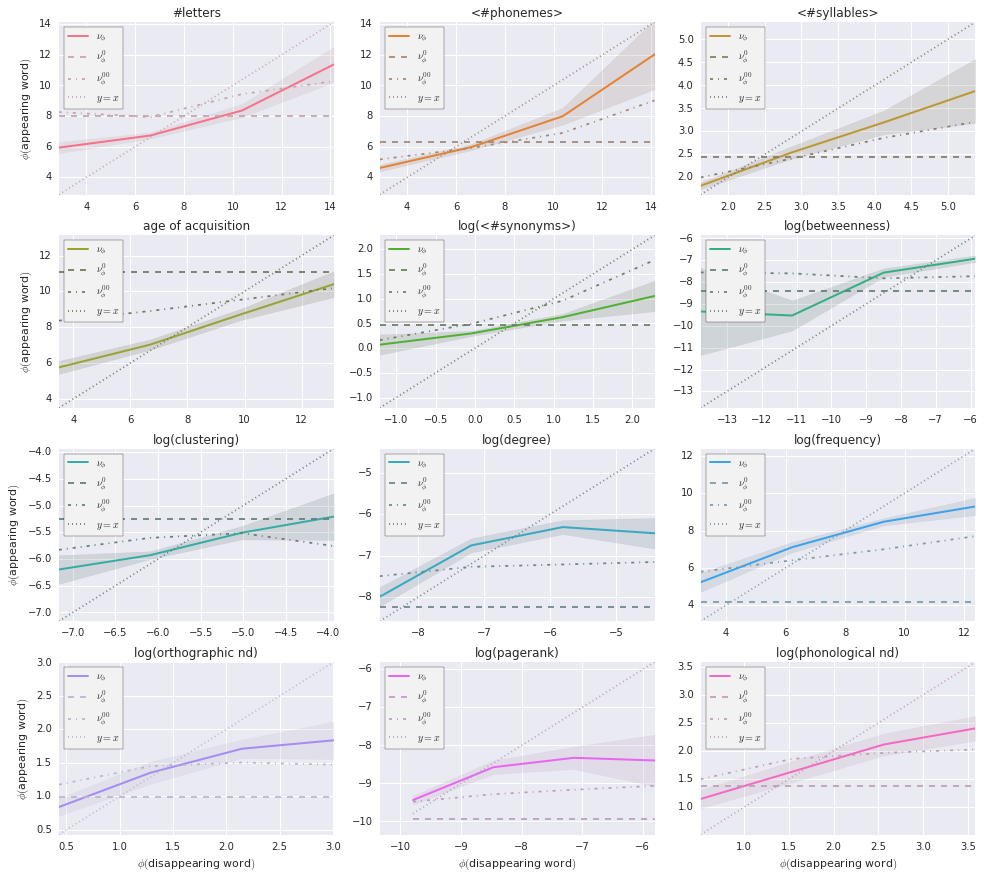

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

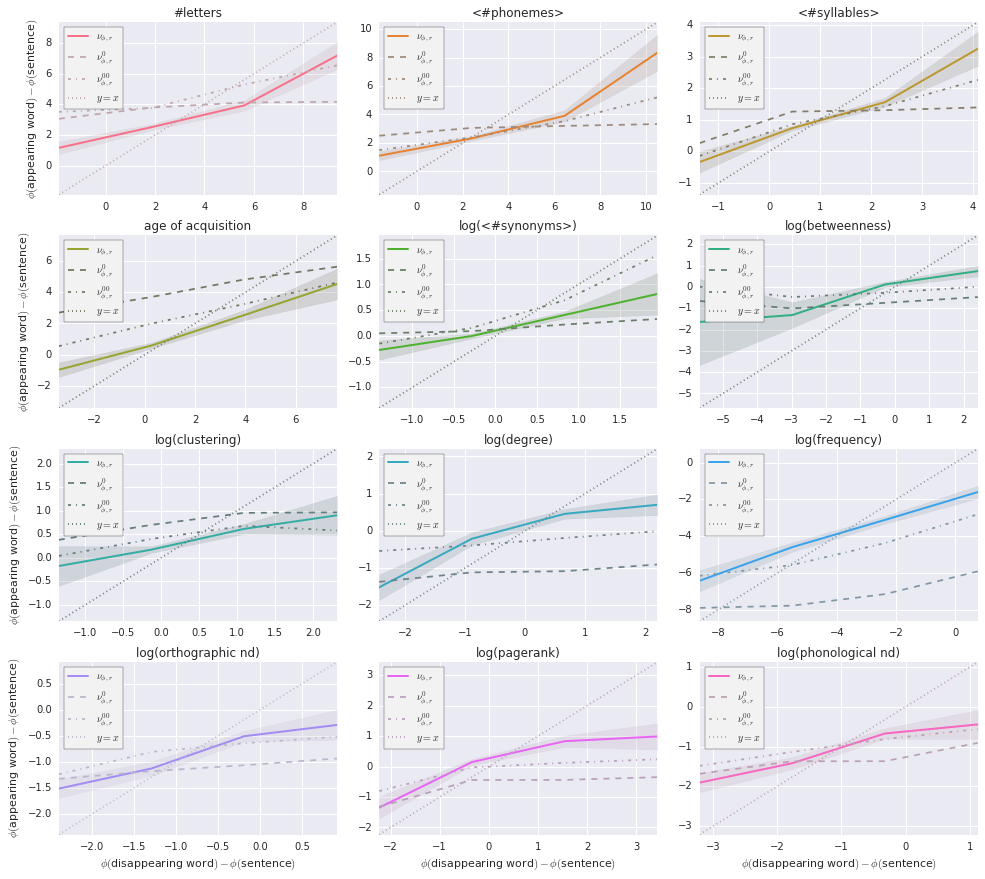

In [8]:
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

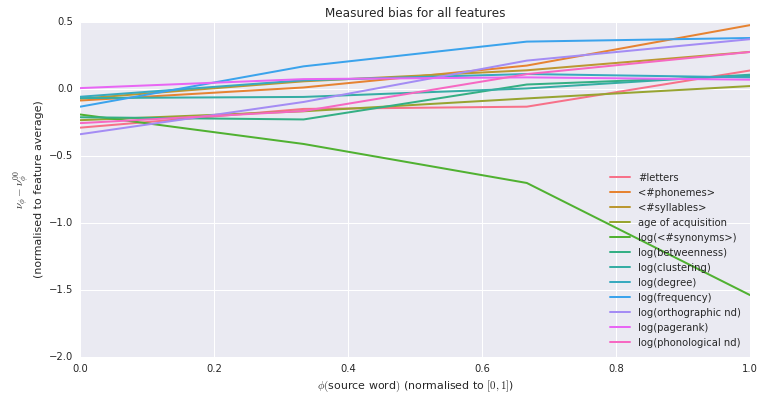

In [9]:
palette = sb.color_palette('husl', len(Substitution.__features__))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], ci=False)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

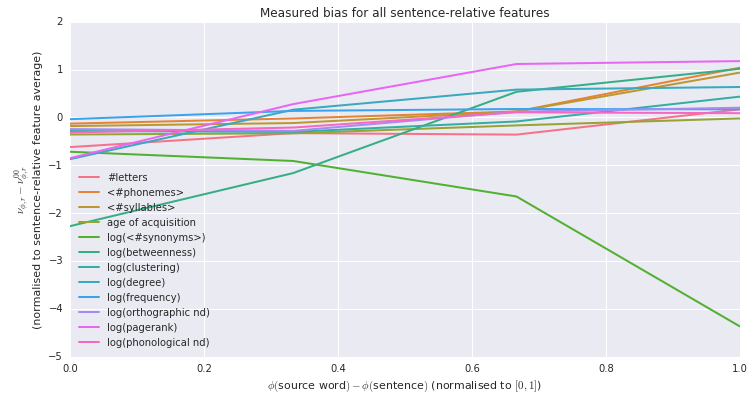

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], ci=False, relative=True)
ax.legend(loc='lower left')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

### 2.3 Feature variations, reduced to features we expose in the paper

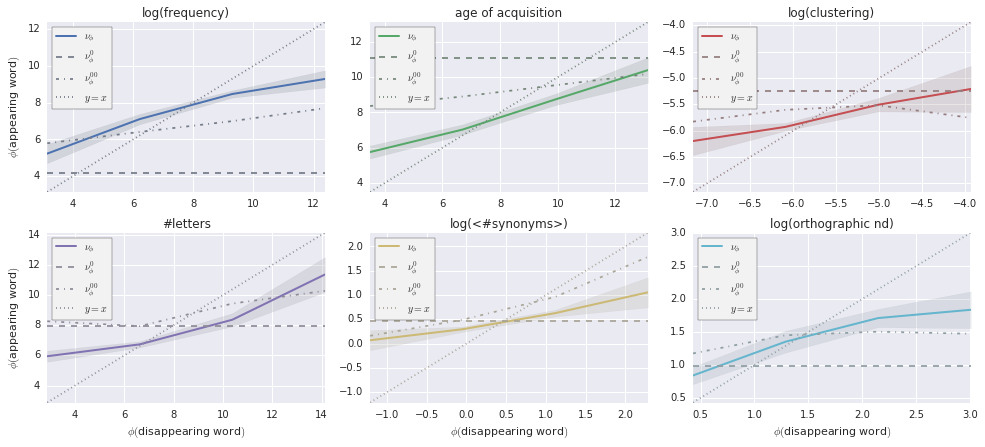

In [11]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

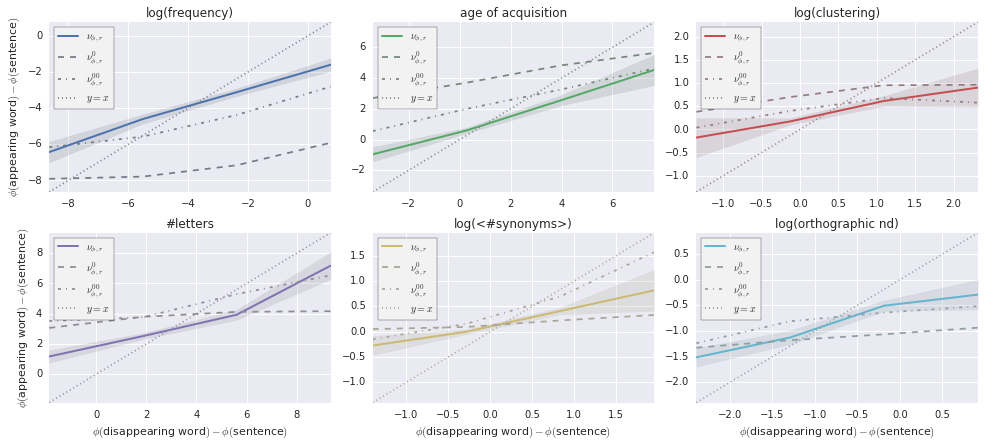

In [12]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Now $\nu_{\phi} - \nu_{\phi}^{00}$

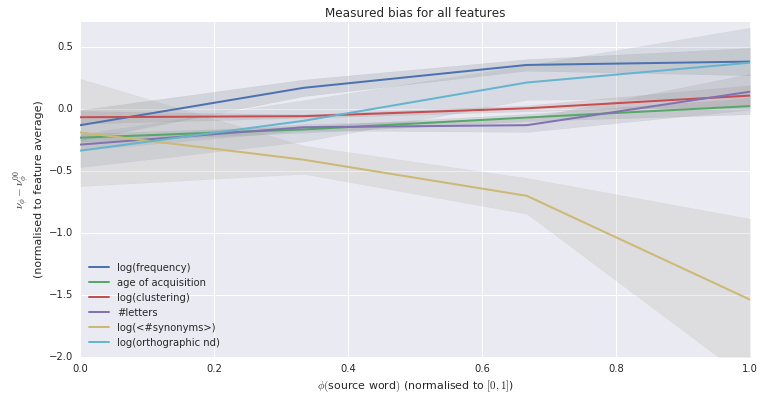

In [13]:
palette = sb.color_palette('deep', len(PAPER_FEATURES))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j])
ax.legend(loc='lower left')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

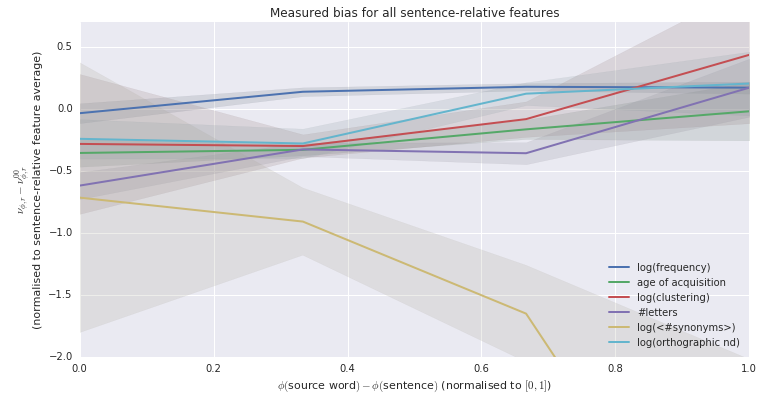

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], relative=True)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [15]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count, right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count, right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (dest[(x_bins == x) & (y_bins == y)] -
                              source[(x_bins == x) & (y_bins == y)]).mean()
            v_values[y, x] = (dest_rel[(x_bins == x) & (y_bins == y)] -
                              source_rel[(x_bins == x) & (y_bins == y)]).mean()
            strength[y, x] = np.sqrt((dest[(x_bins == x) & (y_bins == y)] - 
                                      source[(x_bins == x) & (y_bins == y)]) ** 2 +
                                     (dest_rel[(x_bins == x) & (y_bins == y)] - 
                                      source_rel[(x_bins == x) & (y_bins == y)]) ** 2).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


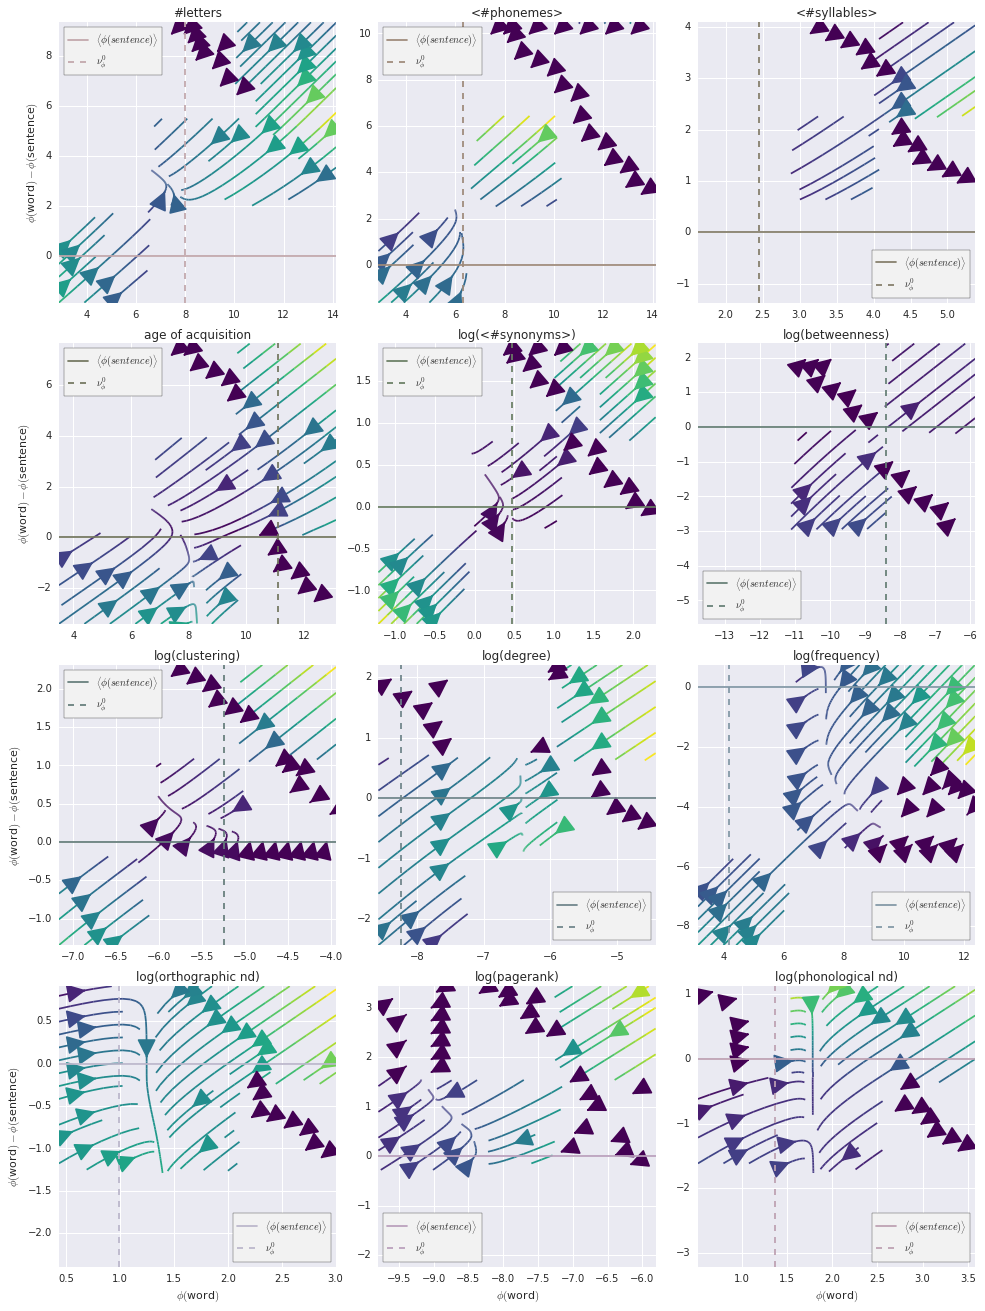

In [16]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


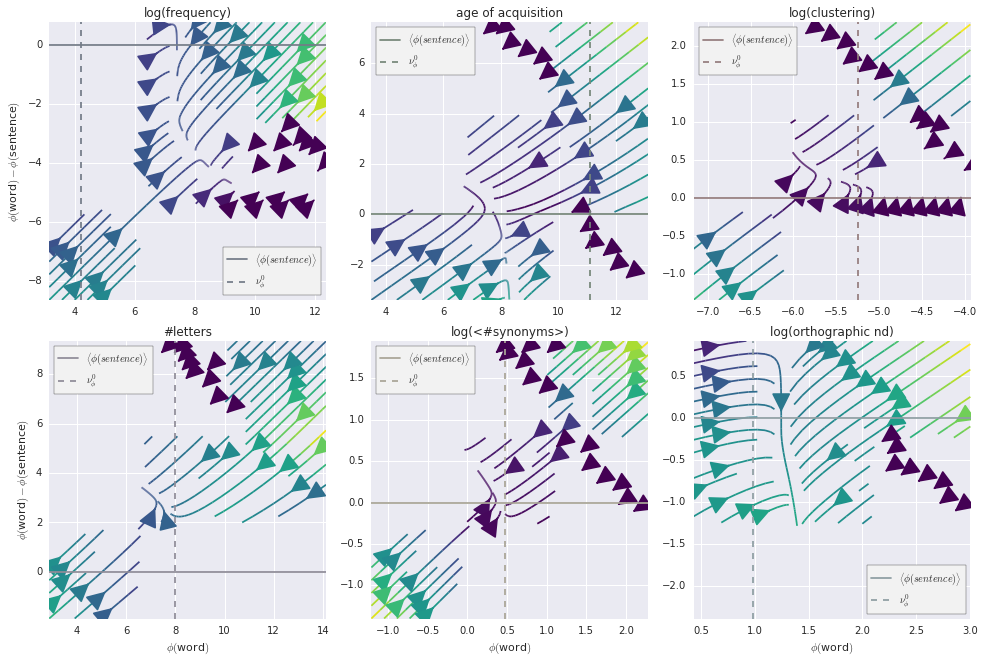

In [17]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account.

### 4.1 On all the features

Compute the actual PCA

In [18]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 11 components.

Those explain the following variance:
[ 0.51910746  0.18758958  0.07855026  0.0747749   0.03321858  0.03054515
  0.02007542  0.01965724  0.0151295   0.01035835  0.00644701]

We're plotting variation for the first 3 components:


,aoa,betweenness,clustering,degree,frequency,letters_count,orthographic_density,pagerank,phonemes_count,phonological_density,syllables_count,synonyms_count
Component-0,0.531664,-0.269670,0.083759,-0.223800,-0.238751,0.418490,-0.214790,-0.262934,0.374703,-0.280183,0.145601,0.000228
Component-1,0.329019,-0.371751,0.129955,-0.295763,-0.235271,-0.436602,0.190257,-0.285124,-0.436793,0.257922,-0.164084,0.038483
Component-2,-0.030783,0.409058,-0.004633,0.100364,-0.892606,-0.049555,0.009008,0.147111,0.005434,0.009204,-0.011556,-0.021393


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [19]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 10138) |           | Elapsed Time: 0:00:39 ETA:  4 days, 16:21:04

  1% (  127 of 10138) |                    | Elapsed Time: 0:00:40 ETA:  0:00:39

  2% (  254 of 10138) |                    | Elapsed Time: 0:00:41 ETA:  0:00:38

  3% (  381 of 10138) |                    | Elapsed Time: 0:00:42 ETA:  0:00:37

  5% (  507 of 10138) |#                   | Elapsed Time: 0:00:43 ETA:  0:00:37

  6% (  634 of 10138) |#                   | Elapsed Time: 0:00:44 ETA:  0:00:36

  7% (  761 of 10138) |#                   | Elapsed Time: 0:00:46 ETA:  0:00:37

  8% (  888 of 10138) |#                   | Elapsed Time: 0:00:46 ETA:  0:00:34

 10% ( 1014 of 10138) |##                  | Elapsed Time: 0:00:48 ETA:  0:00:35

 11% ( 1141 of 10138) |##                  | Elapsed Time: 0:00:49 ETA:  0:00:33

 12% ( 1268 of 10138) |##                  | Elapsed Time: 0:00:49 ETA:  0:00:30

 13% ( 1394 of 10138) |##                  | Elapsed Time: 0:00:50 ETA:  0:00:28

 15% ( 1521 of 10138) |###                 | Elapsed Time: 0:00:51 ETA:  0:00:26

 16% ( 1648 of 10138) |###                 | Elapsed Time: 0:00:52 ETA:  0:00:22

 17% ( 1775 of 10138) |###                 | Elapsed Time: 0:00:53 ETA:  0:00:24

 18% ( 1901 of 10138) |###                 | Elapsed Time: 0:00:54 ETA:  0:00:22

 20% ( 2028 of 10138) |####                | Elapsed Time: 0:00:55 ETA:  0:00:21

 21% ( 2155 of 10138) |####                | Elapsed Time: 0:00:56 ETA:  0:00:23

 22% ( 2282 of 10138) |####                | Elapsed Time: 0:00:57 ETA:  0:00:21

 23% ( 2408 of 10138) |####                | Elapsed Time: 0:00:58 ETA:  0:00:21

 25% ( 2535 of 10138) |#####               | Elapsed Time: 0:00:59 ETA:  0:00:19

 25% ( 2623 of 10138) |#####               | Elapsed Time: 0:01:02 ETA:  0:00:45

 26% ( 2662 of 10138) |#####               | Elapsed Time: 0:01:02 ETA:  0:00:49

 27% ( 2788 of 10138) |#####               | Elapsed Time: 0:01:03 ETA:  0:00:46

 28% ( 2915 of 10138) |#####               | Elapsed Time: 0:01:04 ETA:  0:00:49

 30% ( 3042 of 10138) |######              | Elapsed Time: 0:01:05 ETA:  0:00:46

 31% ( 3169 of 10138) |######              | Elapsed Time: 0:01:06 ETA:  0:00:38

 32% ( 3295 of 10138) |######              | Elapsed Time: 0:01:07 ETA:  0:00:35

 33% ( 3422 of 10138) |######              | Elapsed Time: 0:01:08 ETA:  0:00:30

 35% ( 3549 of 10138) |#######             | Elapsed Time: 0:01:09 ETA:  0:00:06

 35% ( 3644 of 10138) |#######             | Elapsed Time: 0:01:10 ETA:  0:00:07

 36% ( 3676 of 10138) |#######             | Elapsed Time: 0:01:10 ETA:  0:00:09

 37% ( 3802 of 10138) |#######             | Elapsed Time: 0:01:12 ETA:  0:00:09

 38% ( 3929 of 10138) |#######             | Elapsed Time: 0:01:12 ETA:  0:00:08

 40% ( 4056 of 10138) |########            | Elapsed Time: 0:01:13 ETA:  0:00:07

 41% ( 4182 of 10138) |########            | Elapsed Time: 0:01:15 ETA:  0:00:11

 42% ( 4309 of 10138) |########            | Elapsed Time: 0:01:16 ETA:  0:00:09

 43% ( 4436 of 10138) |########            | Elapsed Time: 0:01:17 ETA:  0:00:06

 45% ( 4563 of 10138) |#########           | Elapsed Time: 0:01:18 ETA:  0:00:07

 46% ( 4689 of 10138) |#########           | Elapsed Time: 0:01:19 ETA:  0:00:06

 47% ( 4816 of 10138) |#########           | Elapsed Time: 0:01:20 ETA:  0:00:03

 48% ( 4943 of 10138) |#########           | Elapsed Time: 0:01:21 ETA:  0:00:01

 50% ( 5069 of 10138) |##########          | Elapsed Time: 0:01:22 ETA:  0:00:00

 50% ( 5142 of 10138) |##########          | Elapsed Time: 0:01:23 ETA:  0:00:01

 51% ( 5196 of 10138) |##########          | Elapsed Time: 0:01:23 ETA:  0:00:00

 52% ( 5323 of 10138) |##########          | Elapsed Time: 0:01:24 ETA:  0:00:00

 53% ( 5450 of 10138) |##########          | Elapsed Time: 0:01:25 ETA:  0:00:00

 55% ( 5576 of 10138) |###########         | Elapsed Time: 0:01:26 ETA:  0:00:00

 56% ( 5703 of 10138) |###########         | Elapsed Time: 0:01:27 ETA:  0:00:00

 57% ( 5830 of 10138) |###########         | Elapsed Time: 0:01:28 ETA:  0:00:00

 58% ( 5957 of 10138) |###########         | Elapsed Time: 0:01:29 ETA:  0:00:00

 60% ( 6083 of 10138) |############        | Elapsed Time: 0:01:30 ETA:  0:00:00

 61% ( 6210 of 10138) |############        | Elapsed Time: 0:01:31 ETA:  0:00:00

 62% ( 6337 of 10138) |############        | Elapsed Time: 0:01:31 ETA:  0:00:00

 63% ( 6463 of 10138) |############        | Elapsed Time: 0:01:32 ETA:  0:00:00

 65% ( 6590 of 10138) |#############       | Elapsed Time: 0:01:33 ETA:  0:00:00

 66% ( 6717 of 10138) |#############       | Elapsed Time: 0:01:34 ETA:  0:00:00

 67% ( 6844 of 10138) |#############       | Elapsed Time: 0:01:35 ETA:  0:00:00

 68% ( 6970 of 10138) |#############       | Elapsed Time: 0:01:35 ETA:  0:00:00

 70% ( 7097 of 10138) |##############      | Elapsed Time: 0:01:36 ETA:  0:00:00

 71% ( 7224 of 10138) |##############      | Elapsed Time: 0:01:37 ETA:  0:00:00

 72% ( 7351 of 10138) |##############      | Elapsed Time: 0:01:38 ETA:  0:00:00

 73% ( 7477 of 10138) |##############      | Elapsed Time: 0:01:39 ETA:  0:00:00

 75% ( 7604 of 10138) |###############     | Elapsed Time: 0:01:40 ETA:  0:00:00

 76% ( 7731 of 10138) |###############     | Elapsed Time: 0:01:41 ETA:  0:00:00

 77% ( 7857 of 10138) |###############     | Elapsed Time: 0:01:42 ETA:  0:00:00

 78% ( 7984 of 10138) |###############     | Elapsed Time: 0:01:42 ETA:  0:00:00

 80% ( 8111 of 10138) |################    | Elapsed Time: 0:01:43 ETA:  0:00:00

 81% ( 8238 of 10138) |################    | Elapsed Time: 0:01:44 ETA:  0:00:00

 82% ( 8364 of 10138) |################    | Elapsed Time: 0:01:45 ETA:  0:00:00

 83% ( 8491 of 10138) |################    | Elapsed Time: 0:01:46 ETA:  0:00:00

 85% ( 8618 of 10138) |#################   | Elapsed Time: 0:01:47 ETA:  0:00:00

 86% ( 8745 of 10138) |#################   | Elapsed Time: 0:01:48 ETA:  0:00:00

 87% ( 8871 of 10138) |#################   | Elapsed Time: 0:01:49 ETA:  0:00:00

 88% ( 8998 of 10138) |#################   | Elapsed Time: 0:01:50 ETA:  0:00:00

 90% ( 9125 of 10138) |##################  | Elapsed Time: 0:01:51 ETA:  0:00:00

 91% ( 9251 of 10138) |##################  | Elapsed Time: 0:01:52 ETA:  0:00:00

 92% ( 9378 of 10138) |##################  | Elapsed Time: 0:01:52 ETA:  0:00:00

 93% ( 9505 of 10138) |##################  | Elapsed Time: 0:01:53 ETA:  0:00:00

 95% ( 9632 of 10138) |################### | Elapsed Time: 0:01:54 ETA:  0:00:00

 96% ( 9758 of 10138) |################### | Elapsed Time: 0:01:55 ETA:  0:00:00

 97% ( 9885 of 10138) |################### | Elapsed Time: 0:01:56 ETA:  0:00:00

 98% (10012 of 10138) |################### | Elapsed Time: 0:01:57 ETA:  0:00:00

100% (10138 of 10138) |####################| Elapsed Time: 0:01:58 Time: 0:01:58


Compute cluster averages (so as not to overestimate confidence intervals).

In [20]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)

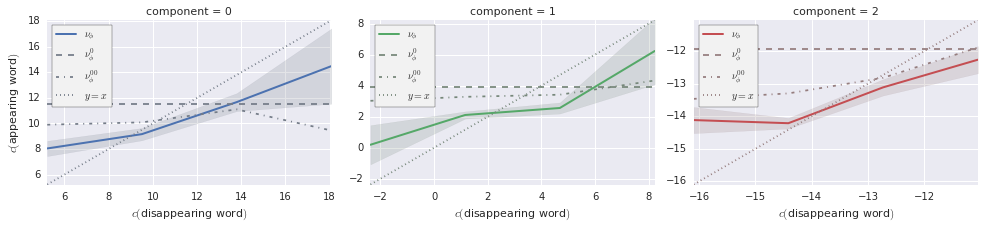

In [21]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation)
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On the features we expose in the paper

Compute the actual PCA

In [22]:
# Compute the PCA.
pcafeatures = tuple(sorted(PAPER_FEATURES))
pcavariations = variations[variations['feature'].map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 3 components.

Those explain the following variance:
[ 0.5703523   0.18551605  0.14196971]

We're plotting variation for the first 3 components:


,aoa,clustering,frequency,letters_count,orthographic_density,synonyms_count
Component-0,0.742302,0.100595,-0.340479,0.505452,-0.259647,-0.006660
Component-1,0.333217,0.146264,-0.516949,-0.720394,0.284157,0.024975
Component-2,0.568656,-0.040142,0.770662,-0.270658,0.073955,-0.048714


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [23]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 10138) |             | Elapsed Time: 0:00:11 ETA:  1 day, 9:28:05

  1% (  127 of 10138) |                    | Elapsed Time: 0:00:12 ETA:  0:01:00

  2% (  254 of 10138) |                    | Elapsed Time: 0:00:13 ETA:  0:00:57

  3% (  381 of 10138) |                    | Elapsed Time: 0:00:14 ETA:  0:00:56

  5% (  507 of 10138) |#                   | Elapsed Time: 0:00:15 ETA:  0:00:56

  6% (  634 of 10138) |#                   | Elapsed Time: 0:00:16 ETA:  0:00:55

  7% (  761 of 10138) |#                   | Elapsed Time: 0:00:17 ETA:  0:00:55

  8% (  888 of 10138) |#                   | Elapsed Time: 0:00:18 ETA:  0:00:52

 10% ( 1014 of 10138) |##                  | Elapsed Time: 0:00:19 ETA:  0:00:52

 11% ( 1141 of 10138) |##                  | Elapsed Time: 0:00:19 ETA:  0:00:51

 12% ( 1268 of 10138) |##                  | Elapsed Time: 0:00:20 ETA:  0:00:49

 13% ( 1394 of 10138) |##                  | Elapsed Time: 0:00:21 ETA:  0:00:48

 15% ( 1521 of 10138) |###                 | Elapsed Time: 0:00:22 ETA:  0:00:47

 16% ( 1648 of 10138) |###                 | Elapsed Time: 0:00:23 ETA:  0:00:45

 17% ( 1775 of 10138) |###                 | Elapsed Time: 0:00:24 ETA:  0:00:45

 18% ( 1901 of 10138) |###                 | Elapsed Time: 0:00:25 ETA:  0:00:43

 20% ( 2028 of 10138) |####                | Elapsed Time: 0:00:25 ETA:  0:00:43

 21% ( 2155 of 10138) |####                | Elapsed Time: 0:00:26 ETA:  0:00:42

 22% ( 2282 of 10138) |####                | Elapsed Time: 0:00:27 ETA:  0:00:41

 23% ( 2408 of 10138) |####                | Elapsed Time: 0:00:28 ETA:  0:00:41

 25% ( 2535 of 10138) |#####               | Elapsed Time: 0:00:29 ETA:  0:00:40

 26% ( 2662 of 10138) |#####               | Elapsed Time: 0:00:30 ETA:  0:00:39

 27% ( 2788 of 10138) |#####               | Elapsed Time: 0:00:31 ETA:  0:00:38

 28% ( 2915 of 10138) |#####               | Elapsed Time: 0:00:31 ETA:  0:00:37

 30% ( 3042 of 10138) |######              | Elapsed Time: 0:00:32 ETA:  0:00:35

 31% ( 3169 of 10138) |######              | Elapsed Time: 0:00:33 ETA:  0:00:33

 32% ( 3295 of 10138) |######              | Elapsed Time: 0:00:34 ETA:  0:00:32

 33% ( 3422 of 10138) |######              | Elapsed Time: 0:00:35 ETA:  0:00:31

 35% ( 3549 of 10138) |#######             | Elapsed Time: 0:00:35 ETA:  0:00:29

 36% ( 3676 of 10138) |#######             | Elapsed Time: 0:00:37 ETA:  0:00:31

 37% ( 3802 of 10138) |#######             | Elapsed Time: 0:00:38 ETA:  0:00:32

 38% ( 3929 of 10138) |#######             | Elapsed Time: 0:00:38 ETA:  0:00:30

 40% ( 4056 of 10138) |########            | Elapsed Time: 0:00:39 ETA:  0:00:29

 41% ( 4182 of 10138) |########            | Elapsed Time: 0:00:40 ETA:  0:00:30

 42% ( 4309 of 10138) |########            | Elapsed Time: 0:00:41 ETA:  0:00:29

 43% ( 4436 of 10138) |########            | Elapsed Time: 0:00:42 ETA:  0:00:30

 45% ( 4563 of 10138) |#########           | Elapsed Time: 0:00:43 ETA:  0:00:30

 46% ( 4689 of 10138) |#########           | Elapsed Time: 0:00:44 ETA:  0:00:26

 47% ( 4816 of 10138) |#########           | Elapsed Time: 0:00:45 ETA:  0:00:26

 48% ( 4943 of 10138) |#########           | Elapsed Time: 0:00:45 ETA:  0:00:23

 50% ( 5069 of 10138) |##########          | Elapsed Time: 0:00:46 ETA:  0:00:22

 51% ( 5196 of 10138) |##########          | Elapsed Time: 0:00:47 ETA:  0:00:22

 52% ( 5323 of 10138) |##########          | Elapsed Time: 0:00:48 ETA:  0:00:21

 53% ( 5450 of 10138) |##########          | Elapsed Time: 0:00:49 ETA:  0:00:19

 55% ( 5576 of 10138) |###########         | Elapsed Time: 0:00:50 ETA:  0:00:18

 56% ( 5703 of 10138) |###########         | Elapsed Time: 0:00:50 ETA:  0:00:17

 57% ( 5830 of 10138) |###########         | Elapsed Time: 0:00:51 ETA:  0:00:14

 58% ( 5957 of 10138) |###########         | Elapsed Time: 0:00:52 ETA:  0:00:14

 60% ( 6083 of 10138) |############        | Elapsed Time: 0:00:53 ETA:  0:00:14

 61% ( 6210 of 10138) |############        | Elapsed Time: 0:00:54 ETA:  0:00:10

 62% ( 6337 of 10138) |############        | Elapsed Time: 0:00:54 ETA:  0:00:10

 63% ( 6463 of 10138) |############        | Elapsed Time: 0:00:55 ETA:  0:00:08

 65% ( 6590 of 10138) |#############       | Elapsed Time: 0:00:56 ETA:  0:00:07

 66% ( 6717 of 10138) |#############       | Elapsed Time: 0:00:57 ETA:  0:00:05

 67% ( 6844 of 10138) |#############       | Elapsed Time: 0:00:57 ETA:  0:00:03

 68% ( 6970 of 10138) |#############       | Elapsed Time: 0:00:58 ETA:  0:00:02

 70% ( 7097 of 10138) |##############      | Elapsed Time: 0:00:59 ETA:  0:00:00

 71% ( 7224 of 10138) |##############      | Elapsed Time: 0:01:00 ETA:  0:00:00

 72% ( 7351 of 10138) |##############      | Elapsed Time: 0:01:00 ETA:  0:00:00

 73% ( 7477 of 10138) |##############      | Elapsed Time: 0:01:01 ETA:  0:00:00

 75% ( 7604 of 10138) |###############     | Elapsed Time: 0:01:02 ETA:  0:00:00

 76% ( 7731 of 10138) |###############     | Elapsed Time: 0:01:03 ETA:  0:00:00

 77% ( 7857 of 10138) |###############     | Elapsed Time: 0:01:03 ETA:  0:00:00

 78% ( 7984 of 10138) |###############     | Elapsed Time: 0:01:04 ETA:  0:00:00

 80% ( 8111 of 10138) |################    | Elapsed Time: 0:01:05 ETA:  0:00:00

 81% ( 8238 of 10138) |################    | Elapsed Time: 0:01:06 ETA:  0:00:00

 82% ( 8364 of 10138) |################    | Elapsed Time: 0:01:07 ETA:  0:00:00

 83% ( 8491 of 10138) |################    | Elapsed Time: 0:01:07 ETA:  0:00:00

 85% ( 8618 of 10138) |#################   | Elapsed Time: 0:01:08 ETA:  0:00:00

 86% ( 8745 of 10138) |#################   | Elapsed Time: 0:01:09 ETA:  0:00:00

 87% ( 8871 of 10138) |#################   | Elapsed Time: 0:01:10 ETA:  0:00:00

 88% ( 8998 of 10138) |#################   | Elapsed Time: 0:01:10 ETA:  0:00:00

 90% ( 9125 of 10138) |##################  | Elapsed Time: 0:01:11 ETA:  0:00:00

 91% ( 9251 of 10138) |##################  | Elapsed Time: 0:01:12 ETA:  0:00:00

 92% ( 9378 of 10138) |##################  | Elapsed Time: 0:01:13 ETA:  0:00:00

 93% ( 9505 of 10138) |##################  | Elapsed Time: 0:01:13 ETA:  0:00:00

 95% ( 9632 of 10138) |################### | Elapsed Time: 0:01:14 ETA:  0:00:00

 96% ( 9758 of 10138) |################### | Elapsed Time: 0:01:15 ETA:  0:00:00

 97% ( 9885 of 10138) |################### | Elapsed Time: 0:01:16 ETA:  0:00:00

 98% (10012 of 10138) |################### | Elapsed Time: 0:01:16 ETA:  0:00:00

100% (10138 of 10138) |####################| Elapsed Time: 0:01:17 Time: 0:01:17


Compute cluster averages (so as not to overestimate confidence intervals).

In [24]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components

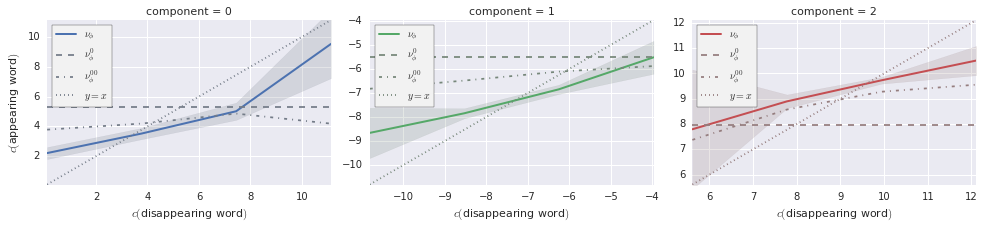

In [25]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation)
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `PAPER_FEATURES`). So note the following:

In [26]:
for feature in PAPER_FEATURES:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature) for feature in PAPER_FEATURES]:
    words.update(tfeature())

data = dict((feature, []) for feature in PAPER_FEATURES)
words_list = []
for word in words:
    words_list.append(word)
    for feature in PAPER_FEATURES:
        data[feature].append(Substitution._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'clustering' is based on 5739 words.
Feature 'letters_count' is based on 42786 words.
Feature 'synonyms_count' is based on 147306 words.
Feature 'orthographic_density' is based on 27751 words.



Among all the set of words used by these features, only 3322 are used.

Similarly, we mined 1174 (cluster-unique) substitutions, but the PCA is in fact computed on 398 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.